## Problem Statement:

A Gold shop owner wants to know the price of the Diamond from it's characteristic such as carat, cut,clarity, color, length, width, height, table length, depth of the diamond. Now, I took a dataset which has all the above mentioned and wants to predict the price of the diamond. The dataset contains the price of the diamonds with respective of the characteristics. 

The colomns represents:

carat-weight of the diamond (0.2--5.01)

cut-quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color-diamond colour, from J (worst) to D (best)


clarity-a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x-length in mm (0--10.74)


y-width in mm (0--58.9)


z-depth in mm (0--31.8)


depth-total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)


table-width of top of diamond relative to widest point (43--95)

price-price in US dollars (\$326--\$18,823)

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading data using panndas

In [2]:
data = pd.read_csv("diamonds.csv")

Firstly, I want to work on small data so I'm slicing the data and working on first 200 rows.

In [3]:
data = data[:200]

Data Insight

In [4]:
data.head()

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.tail()

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
195,196,0.70,Premium,E,SI1,62.7,59.0,2777,5.67,5.63,3.54
196,197,0.70,Premium,E,SI1,61.0,57.0,2777,5.73,5.68,3.48
197,198,0.70,Premium,E,SI1,61.0,58.0,2777,5.78,5.72,3.51
198,199,0.70,Ideal,E,SI1,61.4,57.0,2777,5.76,5.70,3.52
199,200,0.72,Premium,F,SI1,61.8,61.0,2777,5.82,5.71,3.56


In [6]:
data.describe()

,ID,carat,depth,table,price,x,y,z
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000
mean,100.500000,0.525000,61.630000,57.736000,1717.36000,5.051450,5.058350,3.11470
std,57.879185,0.236866,1.609457,2.360863,1165.54816,0.833813,0.822795,0.51238
min,1.000000,0.200000,55.100000,53.000000,326.00000,3.790000,3.750000,2.27000
25%,50.750000,0.290000,60.800000,56.000000,404.00000,4.227500,4.250000,2.61750
50%,100.500000,0.700000,61.700000,57.000000,2760.00000,5.565000,5.580000,3.39000
75%,150.250000,0.720000,62.600000,59.000000,2768.00000,5.790000,5.780000,3.56000
max,200.000000,1.170000,66.300000,69.000000,2777.00000,6.830000,6.900000,4.13000


In [7]:
data.shape

(200, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       200 non-null    int64  
 1   carat    200 non-null    float64
 2   cut      200 non-null    object 
 3   color    200 non-null    object 
 4   clarity  200 non-null    object 
 5   depth    200 non-null    float64
 6   table    200 non-null    float64
 7   price    200 non-null    int64  
 8   x        200 non-null    float64
 9   y        200 non-null    float64
 10  z        200 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.3+ KB


Basic Visulaization

In [9]:
def bar_plot(col):
    sns.countplot(data[col])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


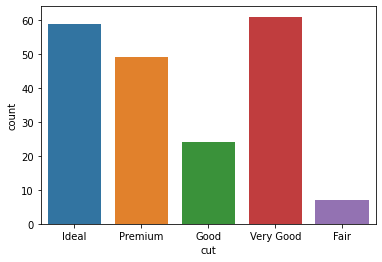

In [10]:
bar_plot('cut')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


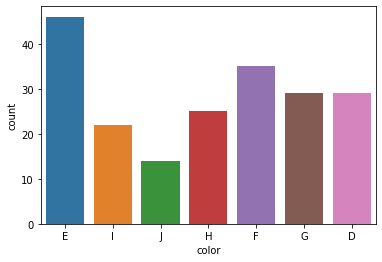

In [11]:
bar_plot('color')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


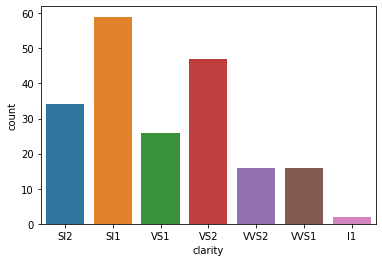

In [12]:
bar_plot('clarity')

In [13]:
def bar_plot2(col1,col2):
    plt.bar(data[col1], data[col2])

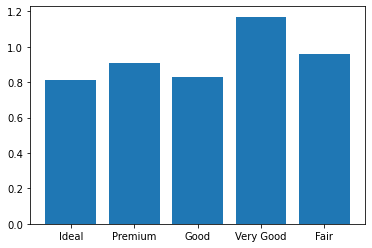

In [14]:
bar_plot2('cut','carat')

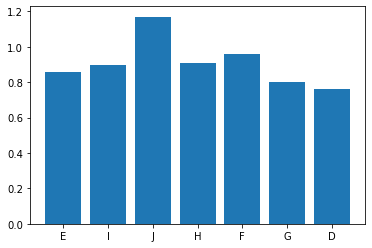

In [15]:
bar_plot2('color','carat')

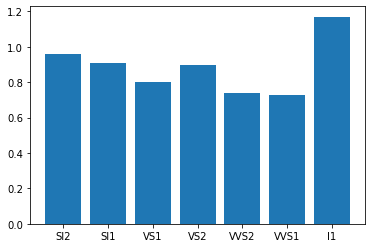

In [16]:
bar_plot2('clarity','carat')

In [17]:
def plt_(col):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(data[col])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


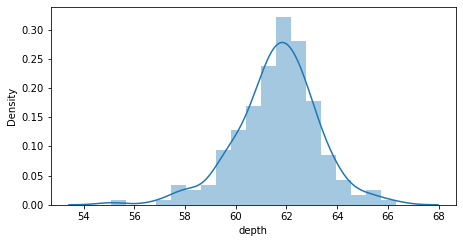

In [18]:
plt_('depth')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


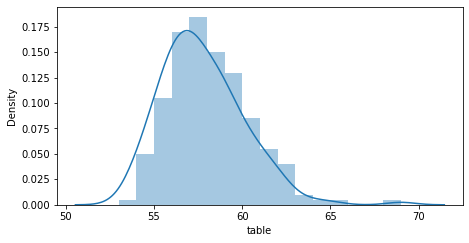

In [19]:
plt_('table')

In [20]:
cut={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5}
data.cut=[cut[i] for i in data.cut]
data['cut'].unique()

array([1, 2, 4, 3, 5], dtype=int64)

In [21]:
color={'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}
data.color=[color[i] for i in data.color]
data['color'].unique()

array([2, 6, 7, 5, 3, 4, 1], dtype=int64)

In [22]:
clarity={'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6,'SI2':7, 'I1':8}
data.clarity=[clarity[i] for i in data.clarity]
data['clarity'].unique()

array([7, 6, 4, 5, 3, 2, 8], dtype=int64)

<AxesSubplot:>

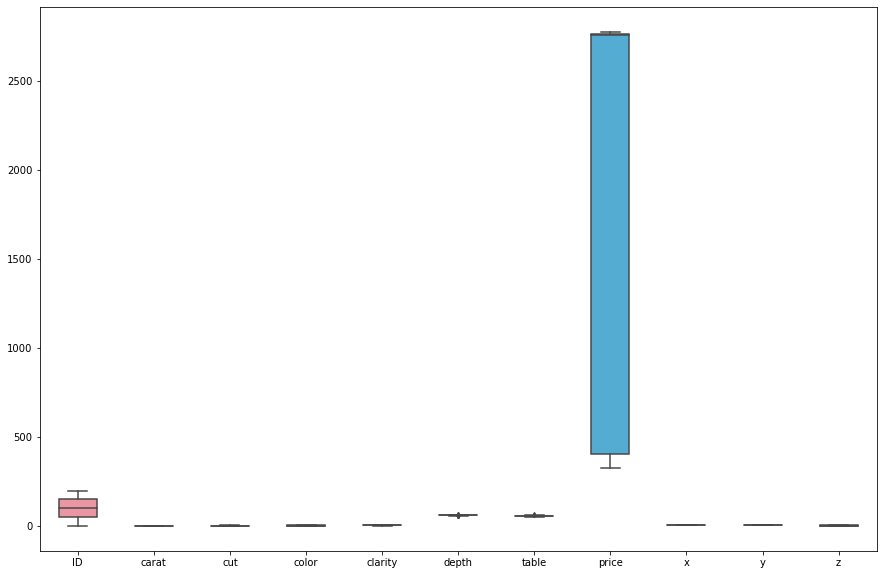

In [23]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

In [24]:
def box_plot(a):
    plt.figure(figsize=(15,2))
    sns.boxplot(x=a, data=data)

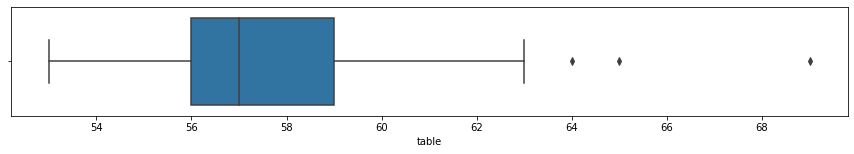

In [25]:
box_plot('table')

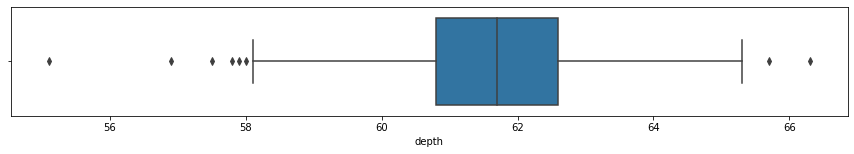

In [26]:
box_plot('depth')

In [27]:
def remove_up_outlier(df,column_name):
    percentile25 = df[column_name].quantile(0.25)
    percentile75 = df[column_name].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #df[df[column_name] > upper_limit]
    #df[df[column_name] < lower_limit]
    new_df = df[df[column_name] < upper_limit] 
    #new_df = df[df[column_name] > lower_limit]
    df[column_name]=new_df[column_name]
    return df.shape,df

In [28]:
def remove_low_outlier(df,column_name):
    percentile25 = df[column_name].quantile(0.25)
    percentile75 = df[column_name].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    #df[df[column_name] > upper_limit]
    #df[df[column_name] < lower_limit]
    #new_df = df[df[column_name] < upper_limit] 
    new_df = df[df[column_name] > lower_limit]
    df[column_name]=new_df[column_name]
    return df.shape,upper_limit,lower_limit,df

In [29]:
remove_up_outlier(data,'depth')

((200, 11),
       ID  carat  cut  color  clarity  depth  table  price     x     y     z
 0      1   0.23    1      2        7   61.5   55.0    326  3.95  3.98  2.43
 1      2   0.21    2      2        6   59.8   61.0    326  3.89  3.84  2.31
 2      3   0.23    4      2        4   56.9   65.0    327  4.05  4.07  2.31
 3      4   0.29    2      6        5   62.4   58.0    334  4.20  4.23  2.63
 4      5   0.31    4      7        7   63.3   58.0    335  4.34  4.35  2.75
 ..   ...    ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
 195  196   0.70    2      2        6   62.7   59.0   2777  5.67  5.63  3.54
 196  197   0.70    2      2        6   61.0   57.0   2777  5.73  5.68  3.48
 197  198   0.70    2      2        6   61.0   58.0   2777  5.78  5.72  3.51
 198  199   0.70    1      2        6   61.4   57.0   2777  5.76  5.70  3.52
 199  200   0.72    2      3        6   61.8   61.0   2777  5.82  5.71  3.56
 
 [200 rows x 11 columns])

In [30]:
remove_low_outlier(data,'depth')

((200, 11),
 65.30000000000001,
 58.099999999999994,
       ID  carat  cut  color  clarity  depth  table  price     x     y     z
 0      1   0.23    1      2        7   61.5   55.0    326  3.95  3.98  2.43
 1      2   0.21    2      2        6   59.8   61.0    326  3.89  3.84  2.31
 2      3   0.23    4      2        4    NaN   65.0    327  4.05  4.07  2.31
 3      4   0.29    2      6        5   62.4   58.0    334  4.20  4.23  2.63
 4      5   0.31    4      7        7   63.3   58.0    335  4.34  4.35  2.75
 ..   ...    ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
 195  196   0.70    2      2        6   62.7   59.0   2777  5.67  5.63  3.54
 196  197   0.70    2      2        6   61.0   57.0   2777  5.73  5.68  3.48
 197  198   0.70    2      2        6   61.0   58.0   2777  5.78  5.72  3.51
 198  199   0.70    1      2        6   61.4   57.0   2777  5.76  5.70  3.52
 199  200   0.72    2      3        6   61.8   61.0   2777  5.82  5.71  3.56
 
 [200 rows x 11 colum

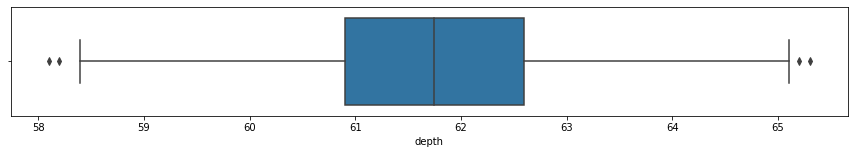

In [31]:
box_plot('depth')

In [32]:
remove_up_outlier(data,'table')

((200, 11),
       ID  carat  cut  color  clarity  depth  table  price     x     y     z
 0      1   0.23    1      2        7   61.5   55.0    326  3.95  3.98  2.43
 1      2   0.21    2      2        6   59.8   61.0    326  3.89  3.84  2.31
 2      3   0.23    4      2        4    NaN    NaN    327  4.05  4.07  2.31
 3      4   0.29    2      6        5   62.4   58.0    334  4.20  4.23  2.63
 4      5   0.31    4      7        7   63.3   58.0    335  4.34  4.35  2.75
 ..   ...    ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
 195  196   0.70    2      2        6   62.7   59.0   2777  5.67  5.63  3.54
 196  197   0.70    2      2        6   61.0   57.0   2777  5.73  5.68  3.48
 197  198   0.70    2      2        6   61.0   58.0   2777  5.78  5.72  3.51
 198  199   0.70    1      2        6   61.4   57.0   2777  5.76  5.70  3.52
 199  200   0.72    2      3        6   61.8   61.0   2777  5.82  5.71  3.56
 
 [200 rows x 11 columns])

In [33]:
remove_low_outlier(data,'table')

((200, 11),
 63.5,
 51.5,
       ID  carat  cut  color  clarity  depth  table  price     x     y     z
 0      1   0.23    1      2        7   61.5   55.0    326  3.95  3.98  2.43
 1      2   0.21    2      2        6   59.8   61.0    326  3.89  3.84  2.31
 2      3   0.23    4      2        4    NaN    NaN    327  4.05  4.07  2.31
 3      4   0.29    2      6        5   62.4   58.0    334  4.20  4.23  2.63
 4      5   0.31    4      7        7   63.3   58.0    335  4.34  4.35  2.75
 ..   ...    ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
 195  196   0.70    2      2        6   62.7   59.0   2777  5.67  5.63  3.54
 196  197   0.70    2      2        6   61.0   57.0   2777  5.73  5.68  3.48
 197  198   0.70    2      2        6   61.0   58.0   2777  5.78  5.72  3.51
 198  199   0.70    1      2        6   61.4   57.0   2777  5.76  5.70  3.52
 199  200   0.72    2      3        6   61.8   61.0   2777  5.82  5.71  3.56
 
 [200 rows x 11 columns])

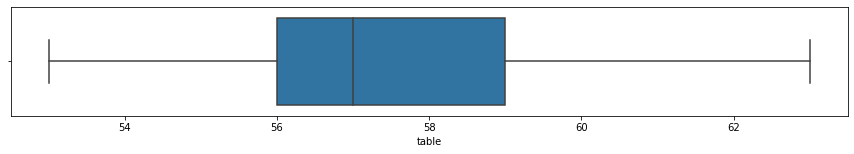

In [34]:
box_plot('table')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       200 non-null    int64  
 1   carat    200 non-null    float64
 2   cut      200 non-null    int64  
 3   color    200 non-null    int64  
 4   clarity  200 non-null    int64  
 5   depth    192 non-null    float64
 6   table    197 non-null    float64
 7   price    200 non-null    int64  
 8   x        200 non-null    float64
 9   y        200 non-null    float64
 10  z        200 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.3 KB


In [36]:
data.fillna(data.median(numeric_only=True).round(1), inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       200 non-null    int64  
 1   carat    200 non-null    float64
 2   cut      200 non-null    int64  
 3   color    200 non-null    int64  
 4   clarity  200 non-null    int64  
 5   depth    200 non-null    float64
 6   table    200 non-null    float64
 7   price    200 non-null    int64  
 8   x        200 non-null    float64
 9   y        200 non-null    float64
 10  z        200 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.3 KB


<AxesSubplot:>

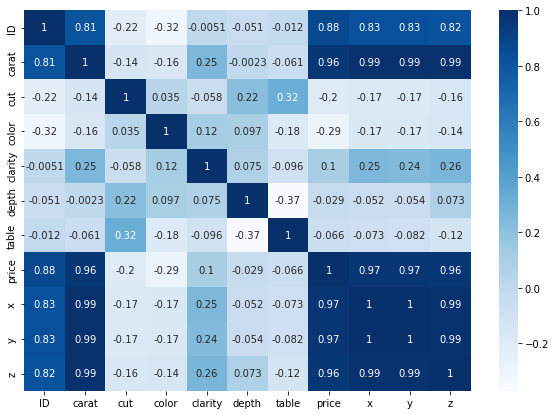

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [39]:
data=data.drop(['x','y','z'],axis=1)

In [40]:
data["price_per_carat"]=data["carat"]/data["price"]

In [41]:
data["price_per_depth"]=data["depth"]/data["price"]

In [42]:
data["price_per_table"]=data["table"]/data["price"]

<AxesSubplot:>

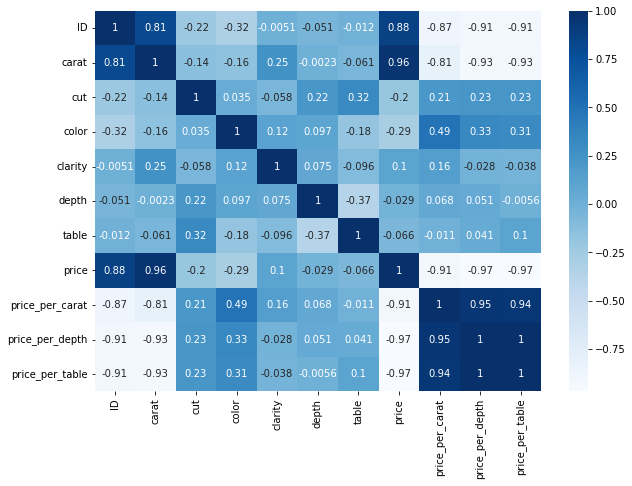

In [43]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [44]:
data=data.drop(['price_per_depth','price_per_table'],axis=1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   carat            200 non-null    float64
 2   cut              200 non-null    int64  
 3   color            200 non-null    int64  
 4   clarity          200 non-null    int64  
 5   depth            200 non-null    float64
 6   table            200 non-null    float64
 7   price            200 non-null    int64  
 8   price_per_carat  200 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 14.2 KB


In [46]:
data.describe()

,ID,carat,cut,color,clarity,depth,table,price,price_per_carat
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000
mean,100.500000,0.525000,2.355000,3.485000,5.13500,61.726000,57.601000,1717.36000,0.000438
std,57.879185,0.236866,1.129315,1.829346,1.49262,1.329346,2.112727,1165.54816,0.000216
min,1.000000,0.200000,1.000000,1.000000,2.00000,58.100000,53.000000,326.00000,0.000195
25%,50.750000,0.290000,1.000000,2.000000,4.00000,60.900000,56.000000,404.00000,0.000257
50%,100.500000,0.700000,2.000000,3.000000,5.00000,61.800000,57.000000,2760.00000,0.000290
75%,150.250000,0.720000,3.000000,5.000000,6.00000,62.600000,59.000000,2768.00000,0.000623
max,200.000000,1.170000,5.000000,7.000000,8.00000,65.300000,63.000000,2777.00000,0.000928


<AxesSubplot:>

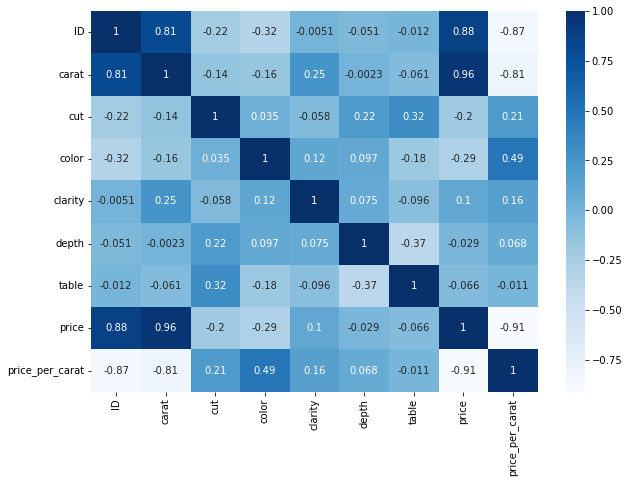

In [47]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [48]:
'''ratio = 0.8

total_rows = data.shape[0]
train_size = int(total_rows*ratio)

train = data[0:train_size]
test = data[train_size:]
'''

'ratio = 0.8\n\ntotal_rows = data.shape[0]\ntrain_size = int(total_rows*ratio)\n\ntrain = data[0:train_size]\ntest = data[train_size:]\n'

In [49]:
train = data.sample(frac=0.8,random_state=357)
test = data.drop(train.index)

In [50]:
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop(['price'], axis=1)
y_test = test['price']

In [51]:
'''X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price',axis=1)
y_test = test['price']'''

"X_train = train.drop('price', axis=1)\ny_train = train['price']\nX_test = test.drop('price',axis=1)\ny_test = test['price']"

In [52]:
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))
X_test.index=range(len(X_test))
y_test.index=range(len(y_test))

In [53]:
def distNeighbours(X_train,y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

In [54]:
def predictOutputNumeric(X_train,y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses

In [55]:
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

In [56]:
output=predictOutputNumeric(X_train,y_train,X_test,3)
getAccuracyNumeric(y_test,output)

79.75833333333333

In [57]:
def r2_score(y_true, y_pred):
    '''
    Calculate R2 score from scratch.
    
    Parameters:
        y_true (array-like): true y values.
        y_pred (array-like): predicted y values.
        
    Returns:
        r2_score (float): R2 score.
    '''
    import numpy as np
    
    # Calculate the mean of the dependent variable y
    y_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean)**2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred)**2)
    
    # Calculate R2 score
    r2_score = 1 - (rss / tss)
    
    return r2_score


In [58]:
r2_score(y_test, output)

0.9999831259206369